# **Polynomial Regression vs Linear Regression**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## *EDA - Exploratory Data Analysis*

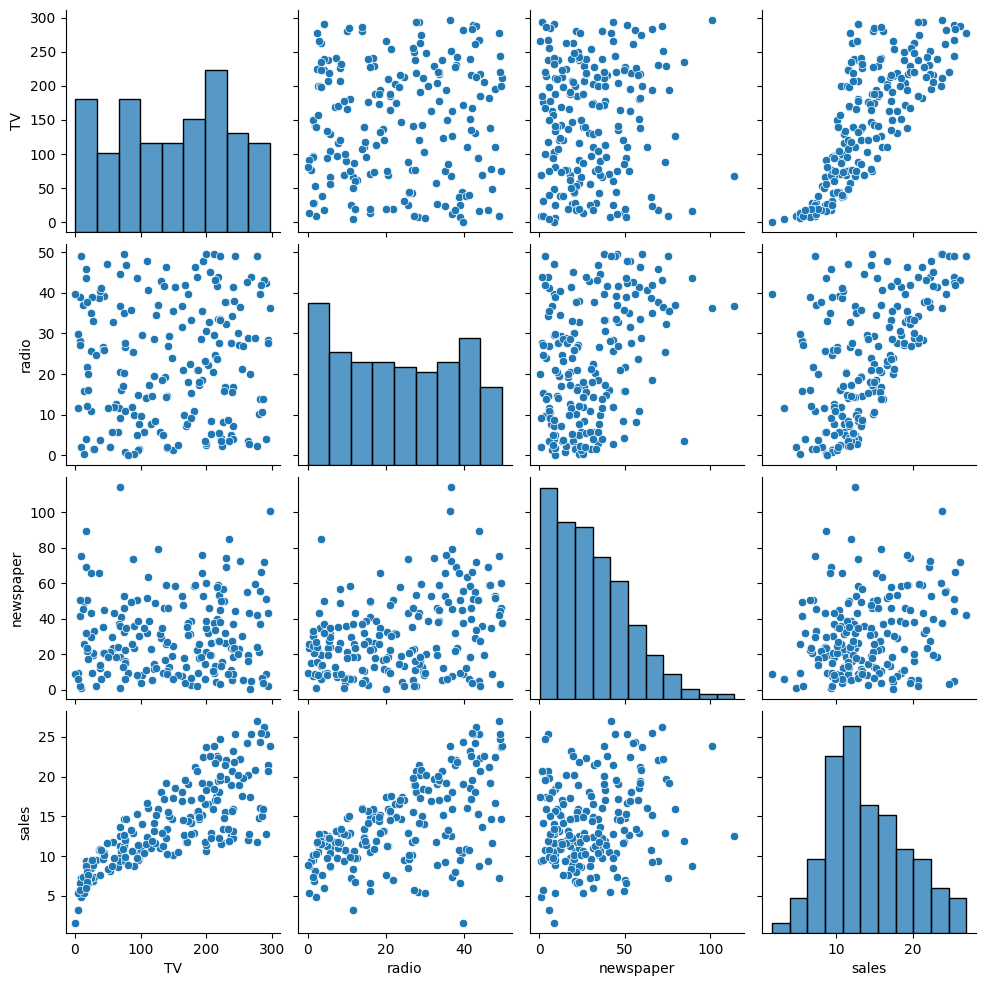

In [4]:
sns.pairplot(df)

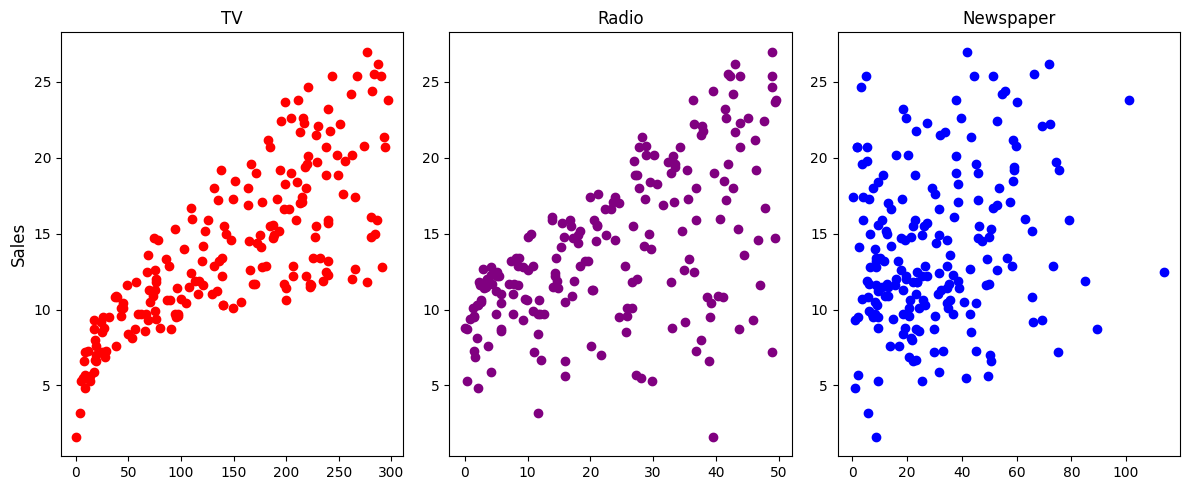

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].set_title("Radio")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].set_title("Newspaper")

ax[0].set_ylabel("Sales", size=12)
plt.tight_layout()

## *np.polyfit() with TV values*

In [6]:
df.shape

(200, 4)

In [7]:
X = df["TV"]
y = df["sales"]

In [8]:
harcamalar = np.linspace(0, 300, 100)

### **1. dereceden**

In [9]:
np.polyfit(X, y, 1)

array([0.04753664, 7.03259355])

In [10]:
# f(x) = ax + b
satis = 0.04753664 * harcamalar + 7.03259355

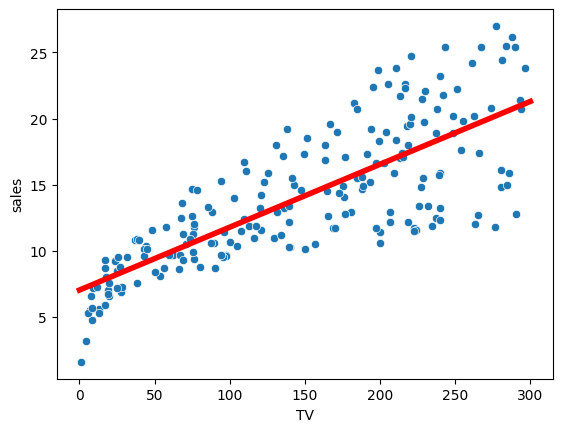

In [11]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(harcamalar, satis, c="red", lw=4)

### **2. dereceden**

In [12]:
np.polyfit(X, y, 2)

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

In [13]:
# f(x) = ax^2 + bx + c
satis2 = -6.84693373e-05 * harcamalar ** 2 + 6.72659270e-02 * harcamalar + 6.11412013e+00

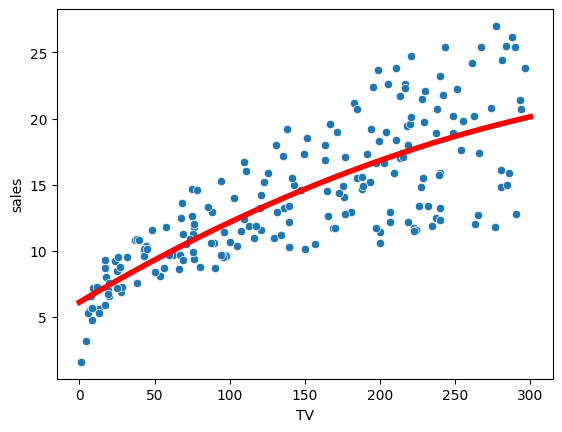

In [14]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(harcamalar, satis2, c="red", lw=4)

### **3. dereceden**

In [15]:
np.polyfit(X, y, 3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

In [16]:
# f(x) = ax^3 + bx^2 + cx + d
satis3 = 5.57199796e-07 * harcamalar ** 3 - 3.15222433e-04 * harcamalar ** 2 + 9.64341770e-02 * harcamalar + 5.42010655e+00

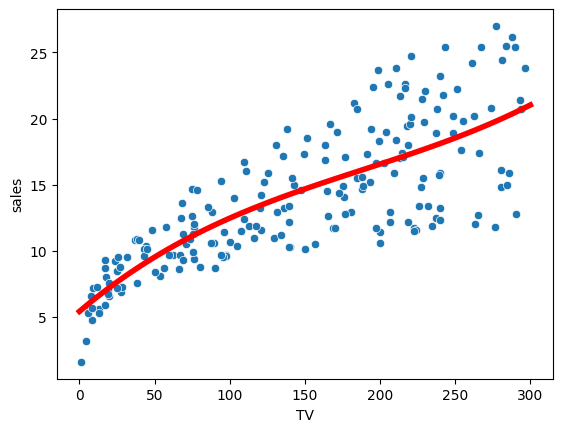

In [17]:
sns.scatterplot(data=df, x="TV", y="sales")
plt.plot(harcamalar, satis3, c="red", lw=4)

## *np.polyfit() with TV, radio and newspapar values*

**This is not work because np.polyfit() wants a 1D vector but we have 3 column.**

## *Train Test Split*

In [18]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

### **Linear Regression - Prediction**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_linear = LinearRegression()

In [23]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [24]:
pred_lin = model_linear.predict(X_test)

### **Linear Regression - Performance**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [26]:
mae = mean_absolute_error(y_test, pred_lin)
rmse = np.sqrt(mean_squared_error(y_test, pred_lin))
r2 = r2_score(y_test, pred_lin)

In [27]:
print("MAE  : ", round(mae, 2))
print("RMSE : ", round(rmse, 2))
print("R^2  : ", round(r2, 2))

MAE  :  1.18
RMSE :  1.44
R^2  :  0.92


### **Linear Regression - Residuals**

In [28]:
res_lin = y_test - pred_lin

<Axes: xlabel='sales', ylabel='sales'>

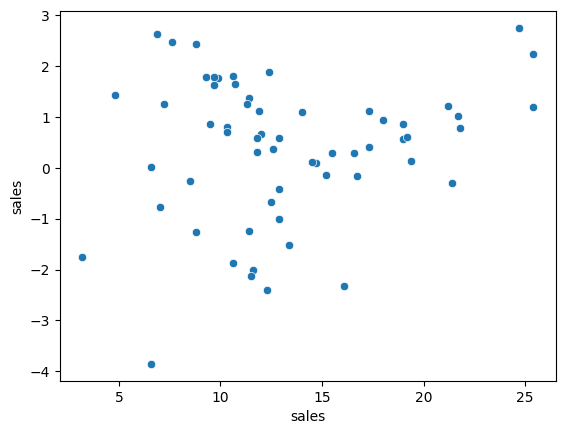

In [29]:
sns.scatterplot(x=y_test, y=res_lin)

<Axes: xlabel='sales', ylabel='Count'>

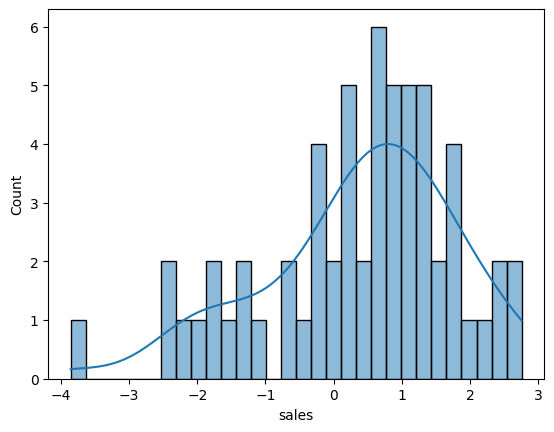

In [30]:
sns.histplot(res_lin, bins=30, kde=True)

### **Linear Regression - Final Model**

In [31]:
final_lin = LinearRegression()

In [32]:
final_lin.fit(X, y)

LinearRegression()

In [33]:
y_hat = final_lin.predict(X)

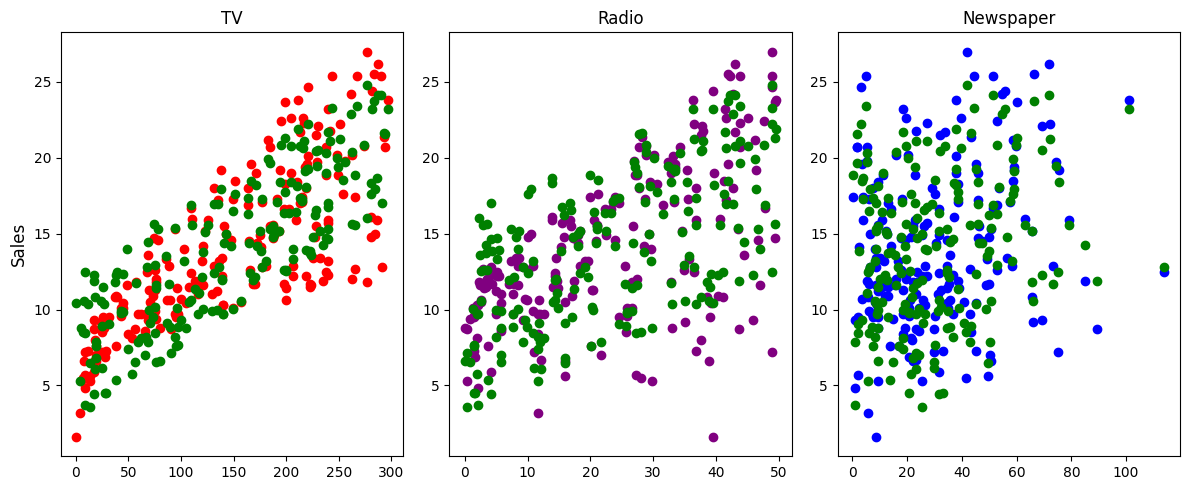

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].plot(df["TV"], y_hat, "o", color="green")
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].plot(df["radio"], y_hat, "o", color="green")
ax[1].set_title("Radio")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="green")
ax[2].set_title("Newspaper")

ax[0].set_ylabel("Sales", size=12)
plt.tight_layout()

### **Polynomial Regression - Prediction**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [37]:
poly_feat = poly_conv.fit_transform(X)

In [38]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [40]:
model_polynomial = LinearRegression(fit_intercept=True)

In [41]:
model_polynomial.fit(X_train, y_train)

LinearRegression()

In [42]:
pred_polynomial = model_polynomial.predict(X_test)

### **Polynomial Regression - Performance**

In [43]:
mae = mean_absolute_error(y_test, pred_polynomial)
rmse = np.sqrt(mean_squared_error(y_test, pred_polynomial))
r2 = r2_score(y_test, pred_polynomial)

In [44]:
print("MAE  : ", round(mae, 2))
print("RMSE : ", round(rmse, 2))
print("R^2  : ", round(r2, 2))

MAE  :  0.47
RMSE :  0.61
R^2  :  0.99


**Polynomial Prediction is much better that Linear Prediction for this dataset.**

### **Polynomial Regression - The Best Regression Degree**

In [45]:
train_rmse = []
test_rmse = []

for d in range(1, 10):
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_Rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_Rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse.append(train_Rmse)
    test_rmse.append(test_Rmse)

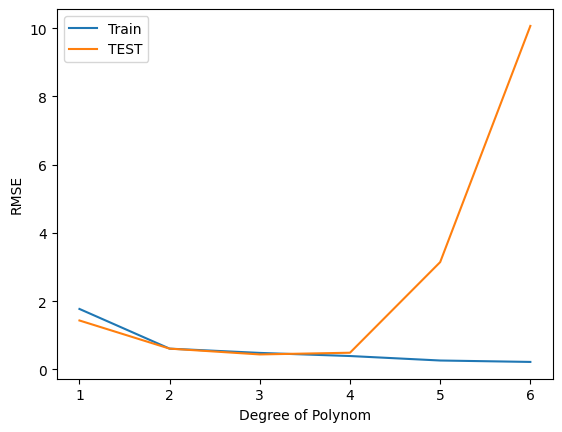

In [46]:
plt.plot(range(1,7), train_rmse[:6], label= "Train")
plt.plot(range(1,7), test_rmse[:6], label= "TEST")
plt.xlabel("Degree of Polynom")
plt.ylabel("RMSE")
plt.legend()

**The Best Degree is 4**

### **Polynomial Regression - Final Model**

In [47]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_feat = poly_reg.fit_transform(X)
poly_reg.fit(x_poly_feat, y)
poly_reg_final = LinearRegression(fit_intercept=True)
poly_reg_final.fit(x_poly_feat, y)

LinearRegression()

In [48]:
poly_reg_final_pred = poly_reg_final.predict(x_poly_feat)

In [49]:
mae = mean_absolute_error(y, poly_reg_final_pred)
rmse = np.sqrt(mean_squared_error(y, poly_reg_final_pred))
r2 = r2_score(y, poly_reg_final_pred)

In [50]:
print("MAE  : ", round(mae, 2))
print("RMSE : ", round(rmse, 2))
print("R^2  : ", round(r2, 2))

MAE  :  0.27
RMSE :  0.38
R^2  :  0.99


### **Polynomial Regression - Visualization**

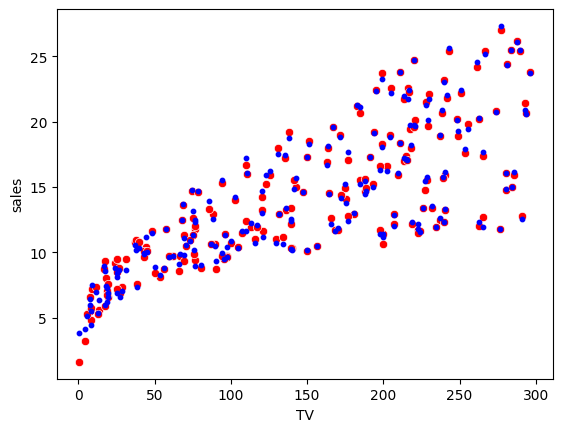

In [51]:
sns.scatterplot(data=df, x= X["TV"], y= y, color= "red")
plt.scatter(X["TV"], poly_reg_final_pred, color= "blue", s= 10)

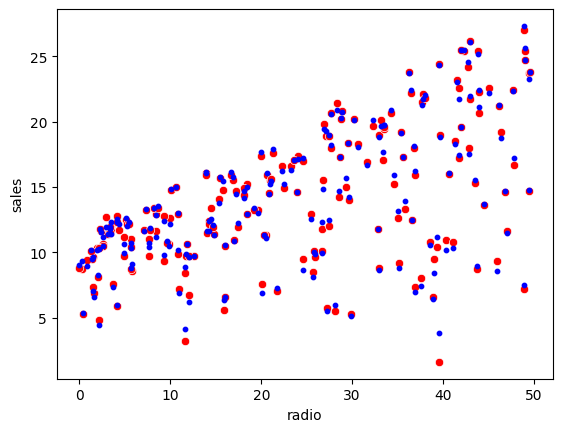

In [52]:
sns.scatterplot(data=df, x= X["radio"], y= y, color= "red")
plt.scatter(X["radio"], poly_reg_final_pred, color= "blue", s= 10)

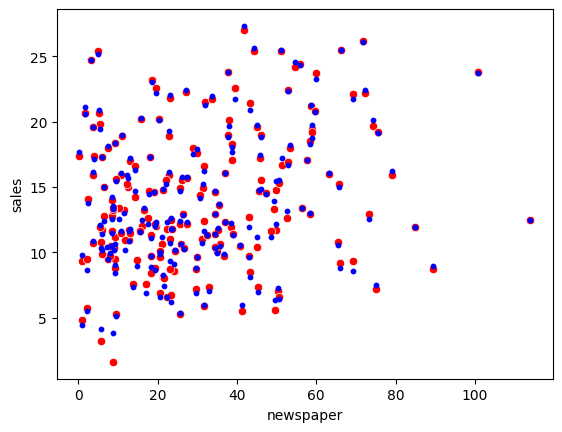

In [53]:
sns.scatterplot(data=df, x= X["newspaper"], y= y, color= "red")
plt.scatter(X["newspaper"], poly_reg_final_pred, color= "blue", s= 10)

In [54]:
X= df[["TV"]]
y= df["sales"]

In [55]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_feat = poly_reg.fit_transform(X)
poly_reg.fit(x_poly_feat, y)
poly_reg_final = LinearRegression(fit_intercept=True)
poly_reg_final.fit(x_poly_feat, y)

LinearRegression()

In [56]:
poly_pred_4_tv = poly_reg_final.predict(x_poly_feat)

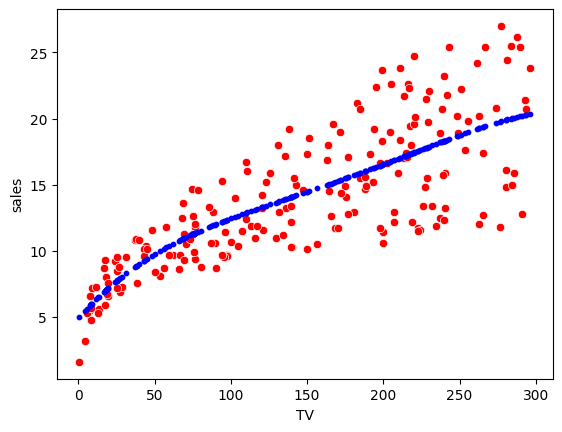

In [57]:
sns.scatterplot(data=df, x= X["TV"], y= y, color= "red")
plt.scatter(X["TV"], poly_pred_4_tv, color= "blue", s= 10)

In [58]:
X= df[["radio"]]
y= df["sales"]

In [59]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_feat = poly_reg.fit_transform(X)
poly_reg.fit(x_poly_feat, y)
poly_reg_final = LinearRegression(fit_intercept=True)
poly_reg_final.fit(x_poly_feat, y)

LinearRegression()

In [60]:
poly_pred_4_radio = poly_reg_final.predict(x_poly_feat)

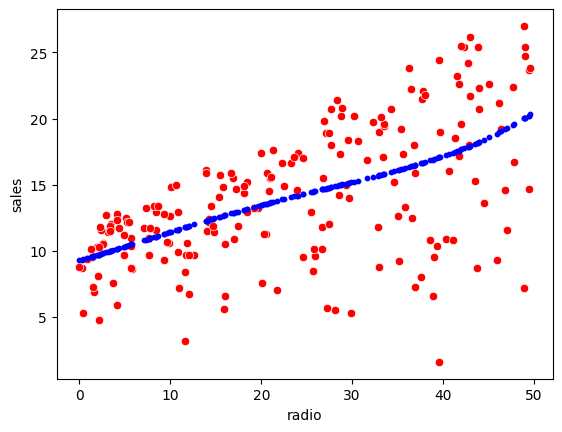

In [61]:
sns.scatterplot(data=df, x= X["radio"], y= y, color= "red")
plt.scatter(X["radio"], poly_pred_4_radio, color= "blue", s= 10)

In [62]:
X= df[["newspaper"]]
y= df["sales"]

In [63]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_feat = poly_reg.fit_transform(X)
poly_reg.fit(x_poly_feat, y)
poly_reg_final = LinearRegression(fit_intercept=True)
poly_reg_final.fit(x_poly_feat, y)

LinearRegression()

In [64]:
poly_pred_4_newspapaer = poly_reg_final.predict(x_poly_feat)

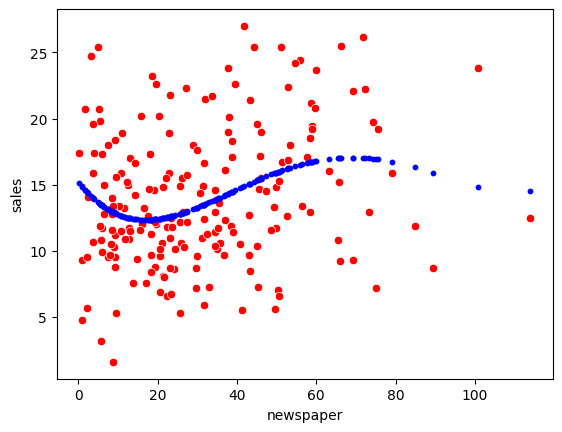

In [65]:
sns.scatterplot(data=df, x= X["newspaper"], y= y, color= "red")
plt.scatter(X["newspaper"], poly_pred_4_newspapaer, color= "blue", s= 10)